In [71]:
from networkx.algorithms.community import greedy_modularity_communities
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

from importlib import reload
import src.data
import cascade_failure.simple_cascade
import src.visualization
import src.atack
reload(cascade_failure.simple_cascade)
reload(src.data)
reload(src.visualization)
reload(src.atack)

from src.data import load_data_with_attributes
from cascade_failure.simple_cascade import cascade_failure_equal_load_distribution, cascade_failure_proportional_load_distribution
from src.atack import random_node_attack, high_degree_node_attack, high_betweenness_node_attack, high_load_node_attack, high_load_capacity_ratio_node_attack, high_load_capacity_ratio_and_degree_node_attack
from Annas_model import cascade_failure
from cascade_failure.updated_model import load_data


In [ ]:
G = load_data_with_attributes()

Graph loaded: 4941 nodes, 6594 edges


In [47]:
attacked_nodes = high_load_capacity_ratio_node_attack(G, number_of_nodes=50)
G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)
#list(G_after_failure.nodes(data=True))


In [103]:
def comm_detection(G, attack_type):
    G = G.copy()
    attacked_nodes = attack_type(G, number_of_nodes=50)
    G_after_failure, steps, failed_per_step, outputs = cascade_failure_proportional_load_distribution(G, attacked_nodes)

    G_after_failure = G_after_failure.subgraph( [n for n, data in G_after_failure.nodes(data=True) if data["failed"] == False] ).copy()
    communities=list(greedy_modularity_communities(G_after_failure))

    for i,comm in enumerate(communities):
        for node in comm:
            G_after_failure.nodes[node]['community'] = i

    #pos={n: (G_after_failure.nodes[n]['x'], G_after_failure.nodes[n]['y']) for n in G_after_failure.nodes if 'x' in G_after_failure.nodes[n] and 'y' in G_after_failure.nodes[n]}

    num_comms = len(communities)
    colours = sns.color_palette("tab20b", len(communities)) + sns.color_palette("tab20c", len(communities))
    colours = colours[:len(communities)]

    plt.figure(figsize=(10,8))
    plt.axis('off')

    pos = {n: tuple(G_after_failure.nodes[n]['pos']) for n in G_after_failure.nodes}

    for i, comm in enumerate(communities):
        nx.draw_networkx_nodes(
            G_after_failure,
            pos,
            nodelist=list(comm),
            node_size=3,
            node_color=[colours[i]],
            label=f"Community {i+1}"
        )

    nx.draw_networkx_edges(G_after_failure, pos, alpha= 0.3, width= 0.5)

    plt.legend(scatterpoints=1, fontsize=8, ncol=3, bbox_to_anchor=(1.02, 1.0))
    attack_name = attack_type.__name__.replace("_", " ").title()
    plt.title(f'Communities in western US power grid network\nAttack type: {attack_name}', fontsize=12)
    plt.show()


Graph loaded: 4941 nodes, 6594 edges


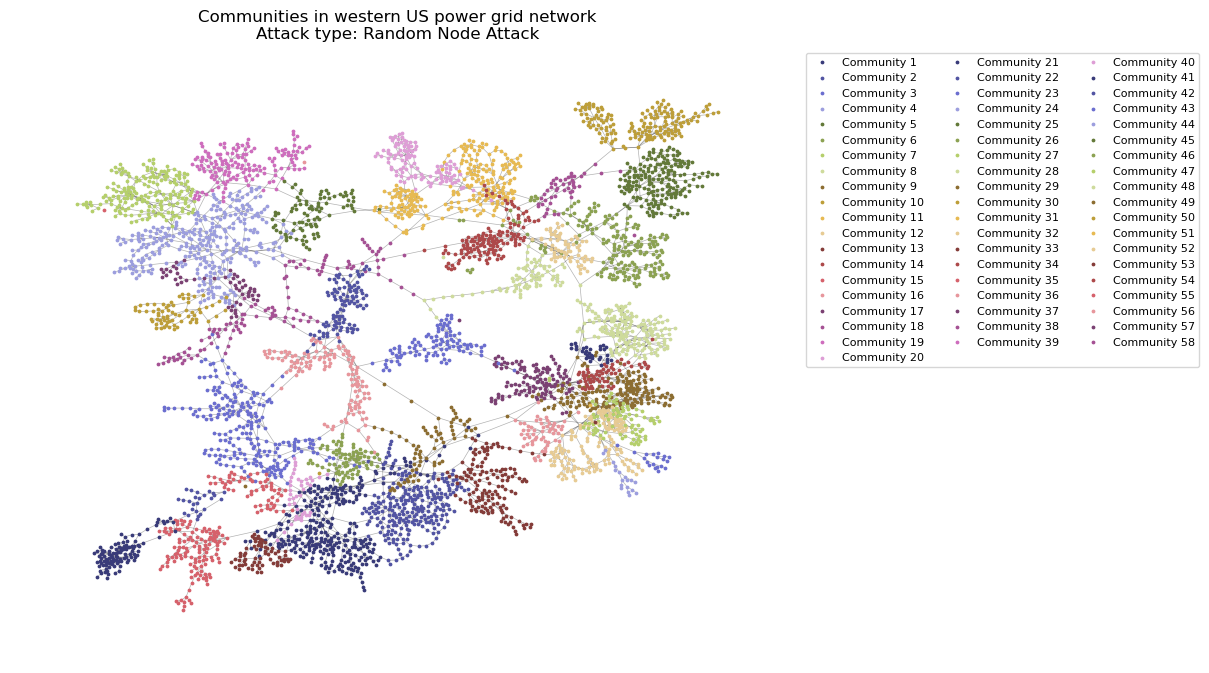

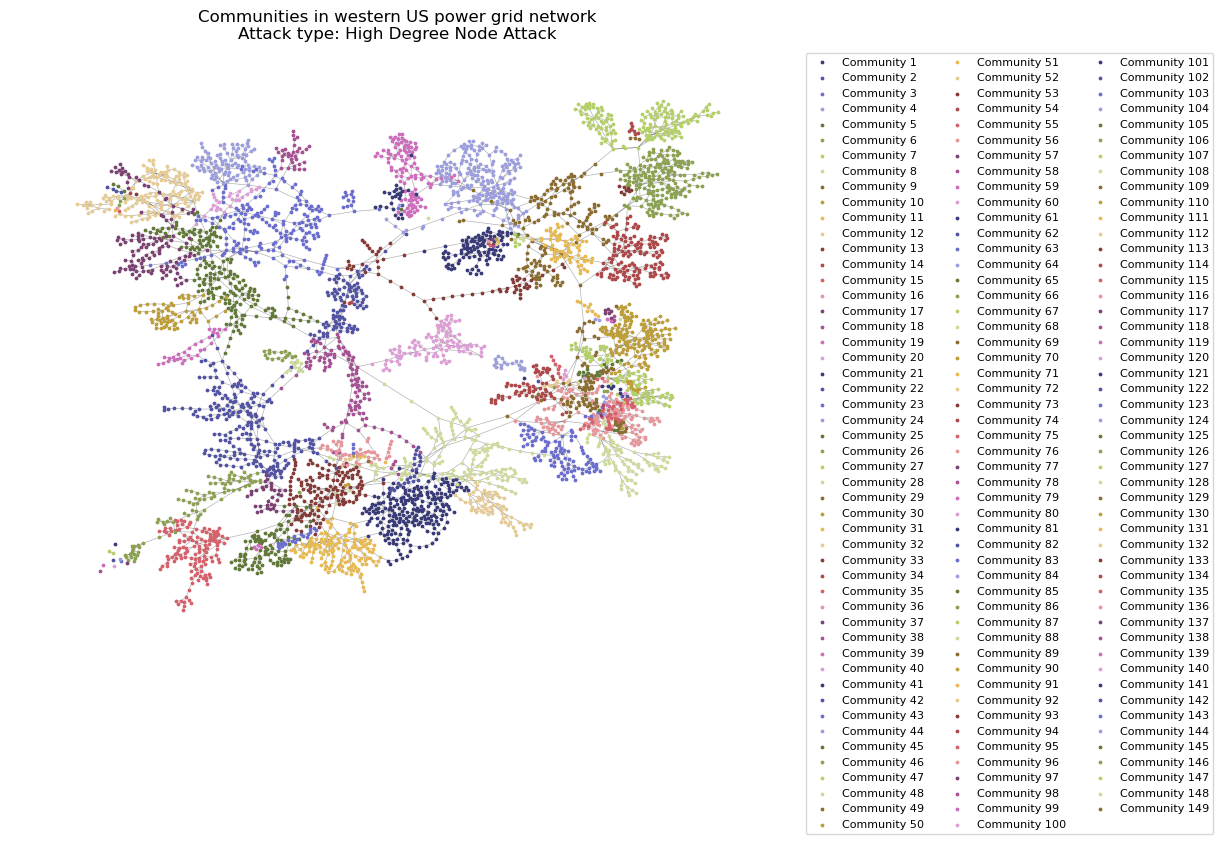

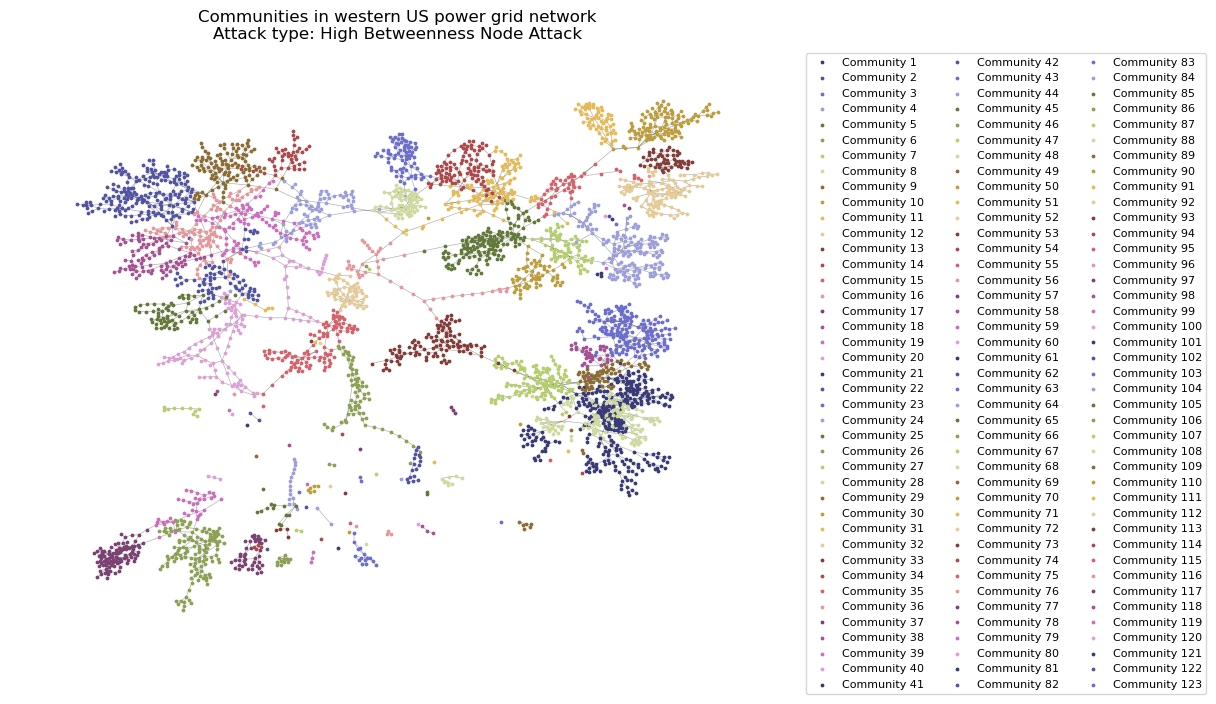

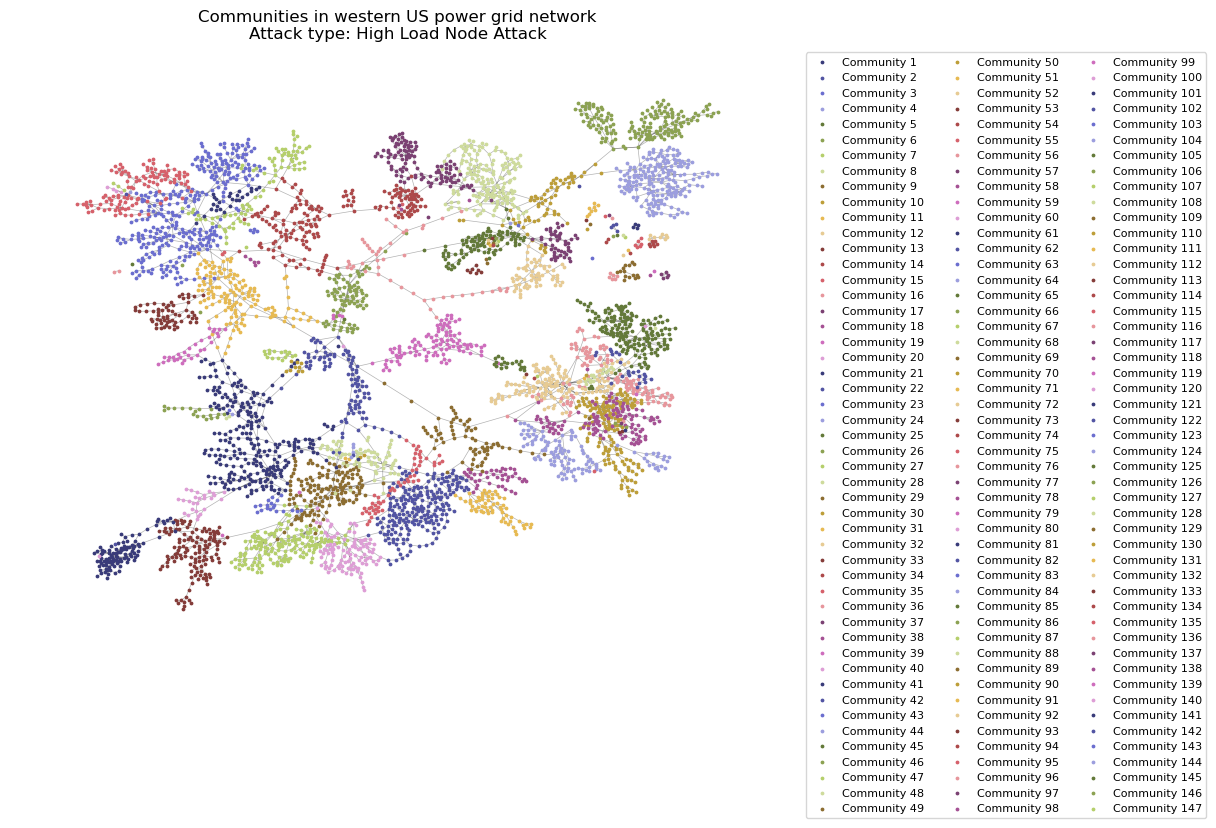

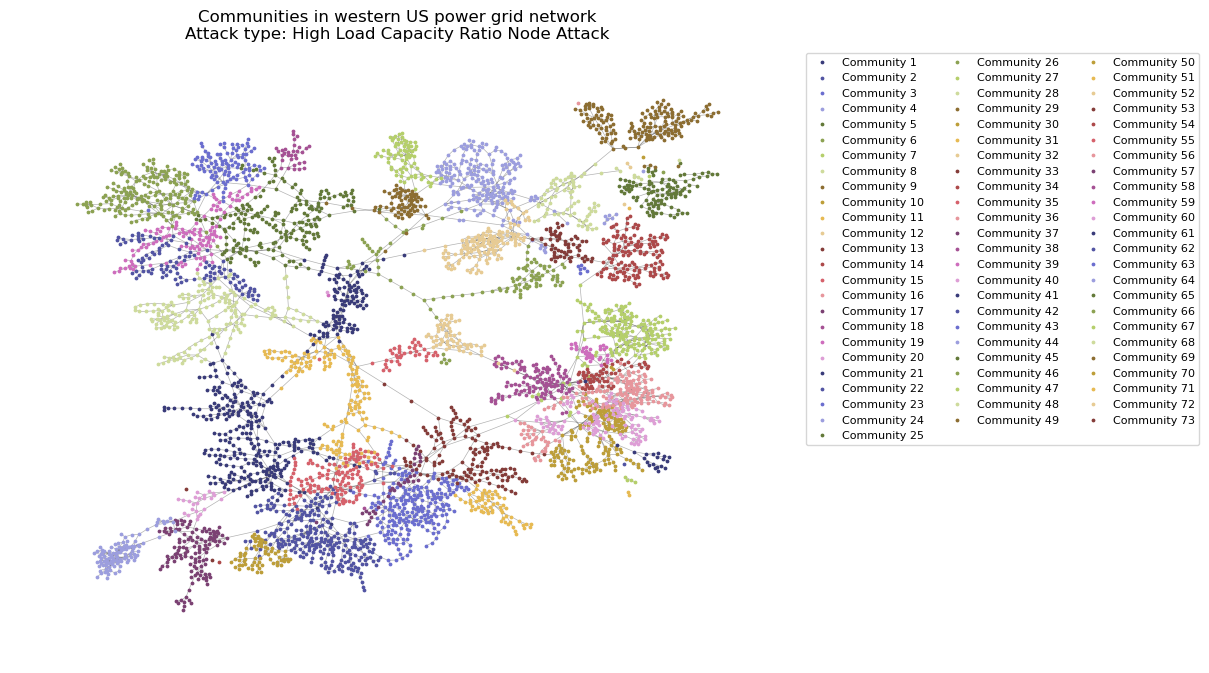

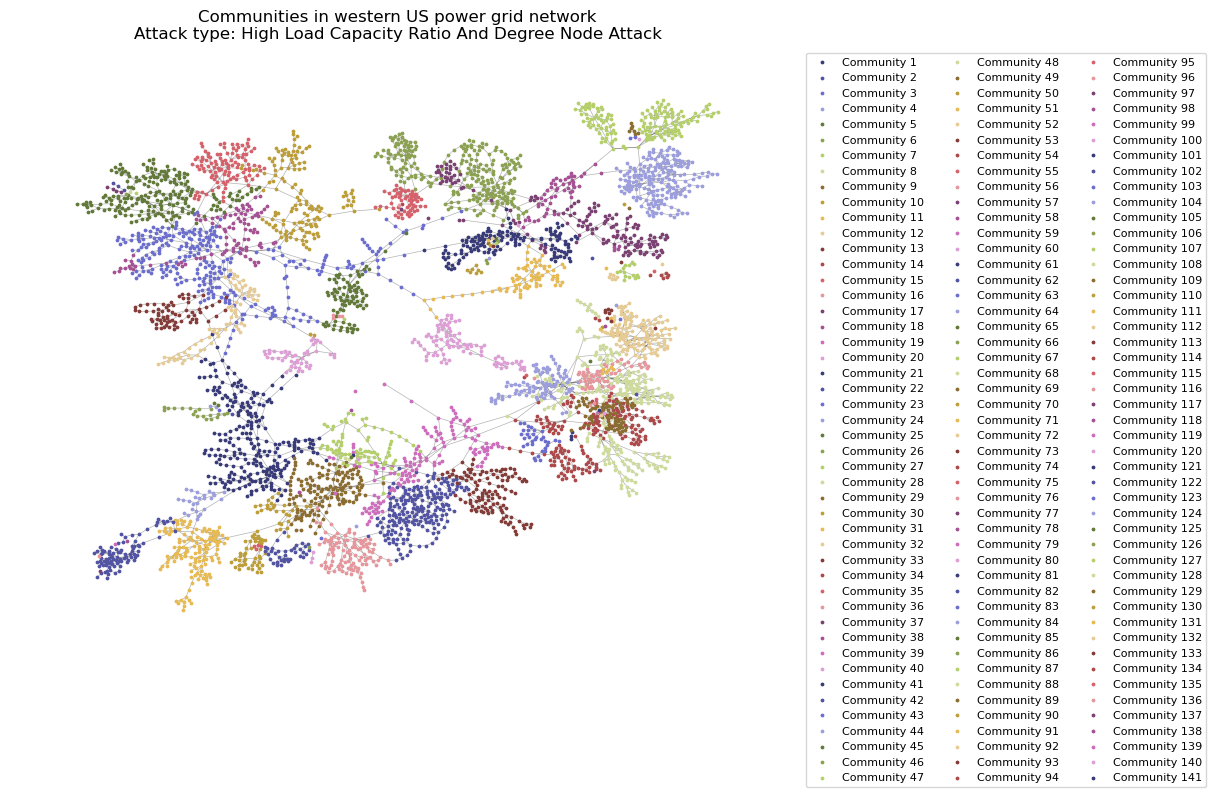

In [104]:
G = load_data_with_attributes()
attack_types = [random_node_attack, high_degree_node_attack, high_betweenness_node_attack, high_load_node_attack, high_load_capacity_ratio_node_attack, high_load_capacity_ratio_and_degree_node_attack]
for atype in attack_types:
    comm_detection(G,atype)

In [72]:
G0 = load_data()
G0 = G0.copy()

alpha = 0.2

result_node8 = cascade_failure(G0,initial_attack=8,alpha=alpha,verbose=True)

print(result_node8)

# Highest betweenness node
bet = nx.betweenness_centrality(G0)
top_node = max(bet, key=bet.get)

result_top = cascade_failure(G0, initial_attack=top_node, alpha=alpha)
print(result_top)

# Random node
import random
rand_node = random.choice(list(G0.nodes()))

result_rand = cascade_failure(G0, initial_attack=rand_node, alpha=alpha)
print(result_rand)



Graph loaded: 4941 nodes, 6594 edges
{'failed_nodes': {8}, 'num_failed': 1, 'largest_cc': 4938, 'remaining_nodes': 4940, 'steps': 1, 'final_graph': <networkx.classes.graph.Graph object at 0x000001ADB100DE10>}
{'failed_nodes': {0, 1, 4099, 2052, 5, 4101, 2054, 2051, 9, 4106, 11, 10, 13, 4110, 4111, 4112, 4113, 4114, 4115, 19, 20, 14, 4119, 2065, 4121, 26, 27, 2073, 29, 2074, 31, 32, 2079, 2080, 35, 36, 4132, 4133, 2086, 40, 41, 42, 2085, 2089, 2091, 46, 47, 4144, 4145, 48, 4146, 52, 4149, 54, 55, 2104, 57, 2099, 59, 60, 4156, 62, 2109, 2111, 4896, 2114, 2115, 4164, 2118, 71, 72, 73, 2120, 75, 4172, 4173, 77, 76, 80, 2126, 82, 83, 2130, 85, 86, 2127, 88, 2129, 2131, 4187, 92, 4188, 91, 95, 96, 97, 4194, 98, 100, 99, 2148, 103, 104, 105, 106, 4201, 4202, 109, 2150, 111, 2154, 113, 2158, 4211, 116, 4213, 4212, 4215, 120, 119, 4218, 123, 124, 4221, 125, 2176, 129, 130, 131, 4227, 2177, 134, 2179, 136, 2061, 138, 139, 140, 141, 2189, 143, 144, 145, 146, 147, 148, 2191, 150, 151, 2195, 2196, 

In [ ]:
def surviving(G_original, result, title=None, attacked_node=None):
    G_final = result["final_graph"]

    pos = nx.get_node_attributes(G_original, "pos")

    # Surviving nodes
    surviving = [n for n in G_final.nodes()]

    pos = {n: tuple(G_after_failure.nodes[n]['pos']) for n in surviving}

    return surviving

In [96]:
def comm_detection2(G_original, result, title=None, attacked_node=None):

    G_final = result["final_graph"]

    surviving = [n for n in G_final.nodes()]

    G_after_failure = G_original.subgraph([n for n, data in G_original.nodes(data=True) if n in surviving]).copy()
                                 
    communities=list(greedy_modularity_communities(G_after_failure))

    for i,comm in enumerate(communities):
        for node in comm:
            G_after_failure.nodes[node]['community'] = i

    #pos={n: (G_after_failure.nodes[n]['x'], G_after_failure.nodes[n]['y']) for n in G_after_failure.nodes if 'x' in G_after_failure.nodes[n] and 'y' in G_after_failure.nodes[n]}

    num_comms = len(communities)
    colours = sns.color_palette("tab20b", len(communities)) + sns.color_palette("tab20c", len(communities))
    colours = colours[:len(communities)]

    plt.figure(figsize=(10,8))
    plt.axis('off')

    pos = {n: tuple(G_after_failure.nodes[n]['pos']) for n in G_after_failure.nodes}

    for i, comm in enumerate(communities):
        nx.draw_networkx_nodes(
            G_after_failure,
            pos,
            nodelist=list(comm),
            node_size=3,
            node_color=[colours[i]],
            label=f"Community {i+1}"
        )

    nx.draw_networkx_edges(G_after_failure, pos, alpha= 0.3, width= 0.5)

    plt.legend(scatterpoints=1, fontsize=8, ncol=3, bbox_to_anchor=(1.02, 1.0))
    plt.title(title, fontsize=12)
    plt.show()


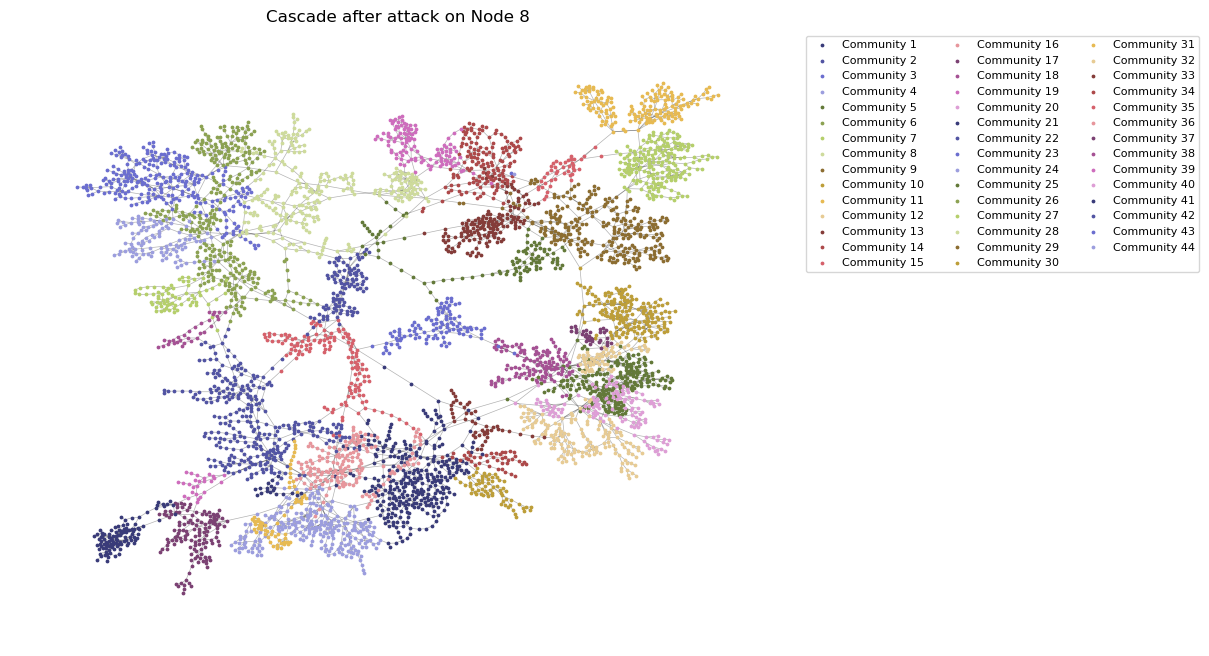

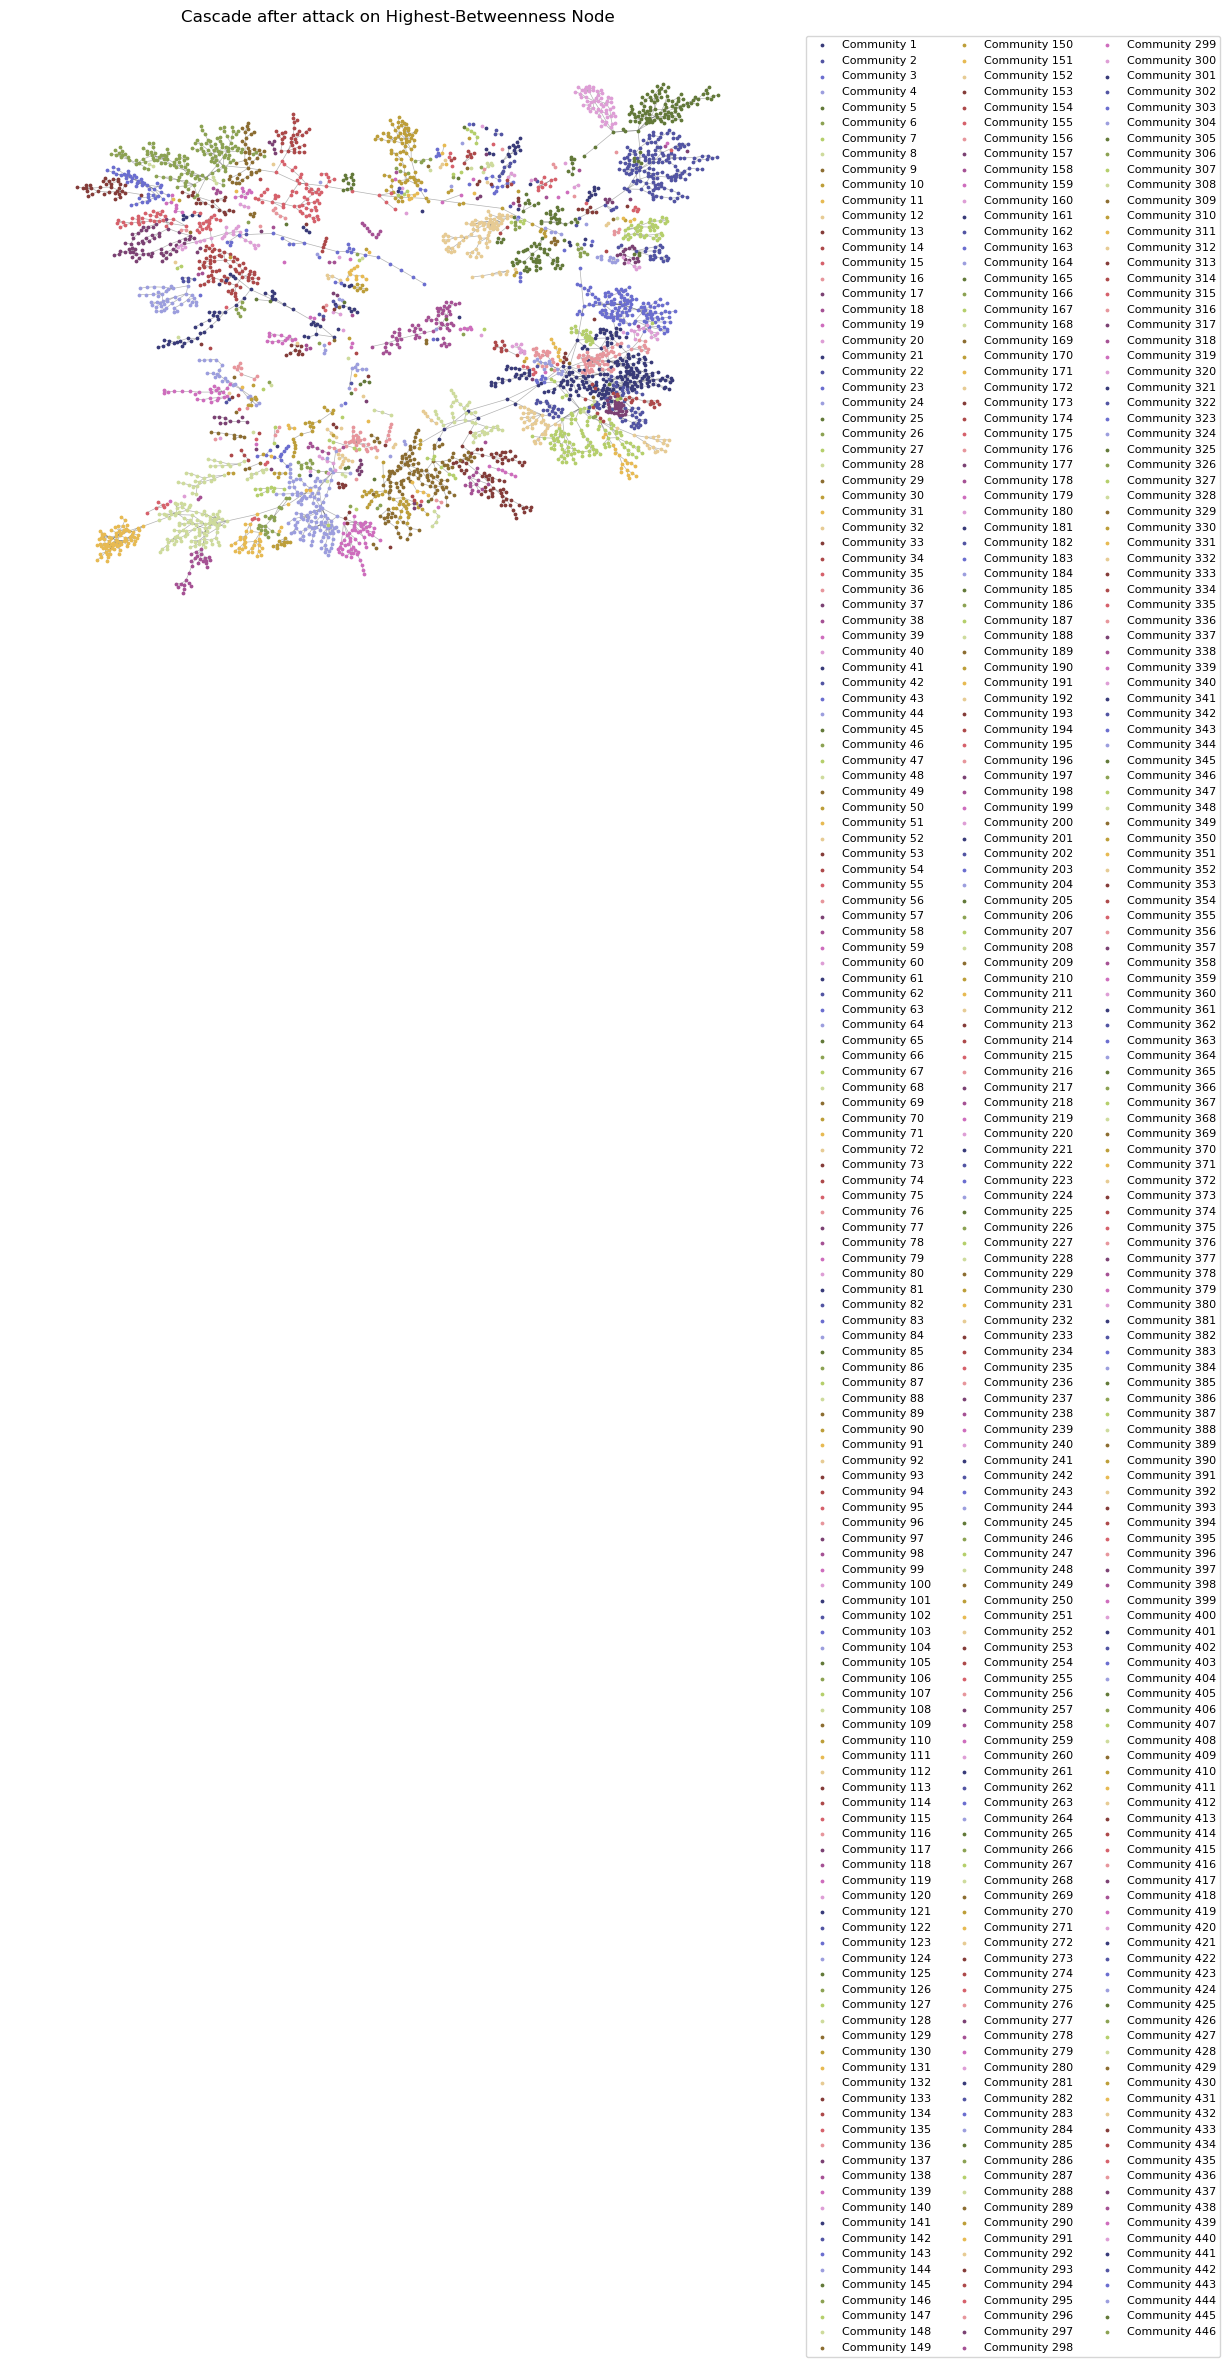

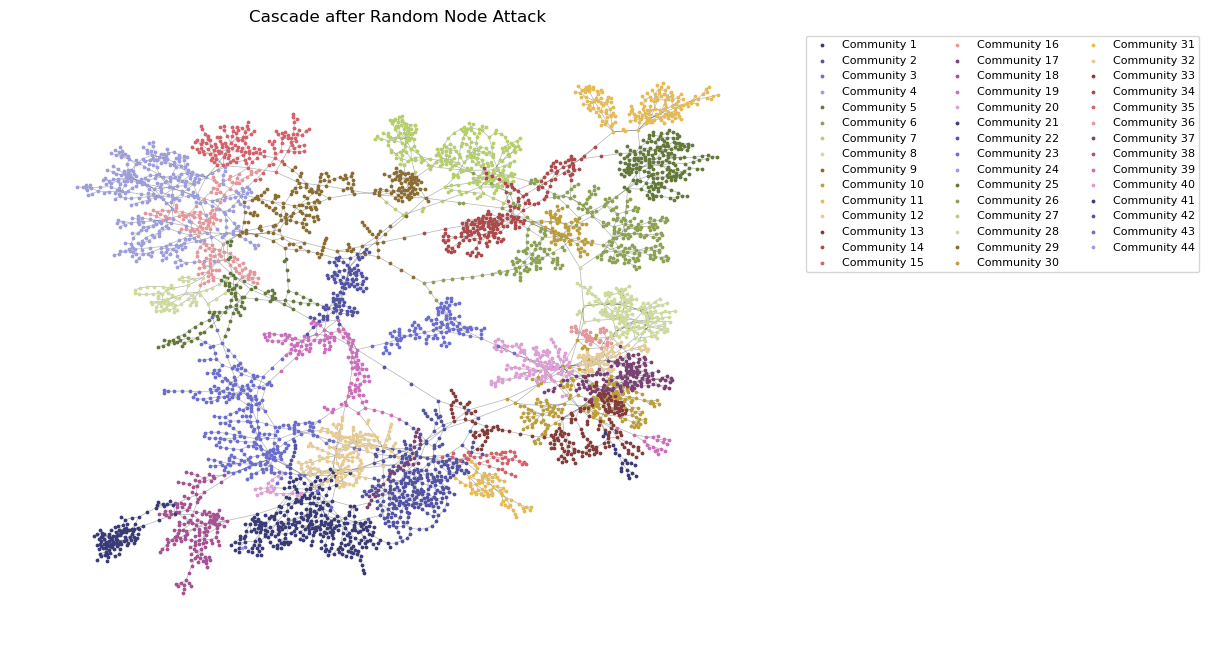

In [97]:
# Node 8 attack
comm_detection2(
    G0,
    result_node8,
    title="Cascade after attack on Node 8",
    attacked_node=8
)

# Highest-betweenness attack
comm_detection2(
    G0,
    result_top,
    title="Cascade after attack on Highest-Betweenness Node",
    attacked_node=top_node
)

# Random node attack
comm_detection2(
    G0,
    result_rand,
    title="Cascade after Random Node Attack",
    attacked_node=rand_node
)